In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import corner
import warnings
warnings.filterwarnings('ignore')

In [1]:
import foreground_model as fg
smf = fg.SMF_Driver_ETGs()
from scipy.integrate import quad   
quad(smf.PDF,11,12.5)[0]*fg.cosmo_astropy.comoving_volume(0.15).value

114887.51893646478

### fiducial sample

In [2]:
with h5py.File('./data/foreground_sample_backup.h5', 'r') as file:
    logMstar = np.array(file['logMstar'])
    logMh = np.array(file['logMh'])
    logRe = np.array(file['logRe'])
    q = np.array(file['q'])
    z = np.array(file['z'])
    gamma_DM = np.array(file['gamma_DM'])
    c = np.array(file['c'])
    r_ein_arcsec = np.array(file['r_ein_arcsec'])

(array([  80.,  112.,  221.,  396.,  617.,  898., 1166., 1563., 2026.,
        2383., 3002., 3340., 3911., 4240., 4486., 4826., 4855., 4906.,
        4848., 4803., 4472., 4154., 3837., 3442., 3135., 2825., 2565.,
        2252., 1987., 1812., 1589., 1391., 1261., 1082.,  957.,  869.,
         765.,  737.,  630.,  564.,  529.,  459.,  415.,  415.,  349.,
         319.,  304.,  280.,  239.,  202.,  197.,  186.,  197.,  157.,
         158.,  145.,  123.,  117.,  106.,  102.,   99.,   96.,   73.,
          63.,   71.,   73.,   67.,   64.,   56.,   43.,   58.,   46.,
          43.,   41.,   44.,   43.,   28.,   41.,   24.,   34.,   32.,
          42.,   34.,   28.,   27.,   27.,   21.,   25.,   13.,   18.,
          14.,   19.,   24.,   17.,   19.,   18.,   20.,   14.,   12.,
          11.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45

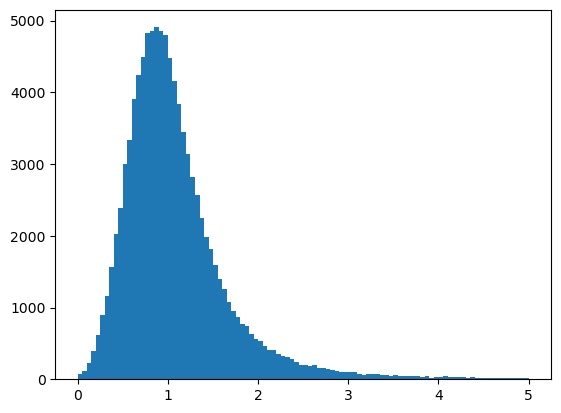

In [4]:
plt.hist(r_ein_arcsec,bins=100, range = (0,5))

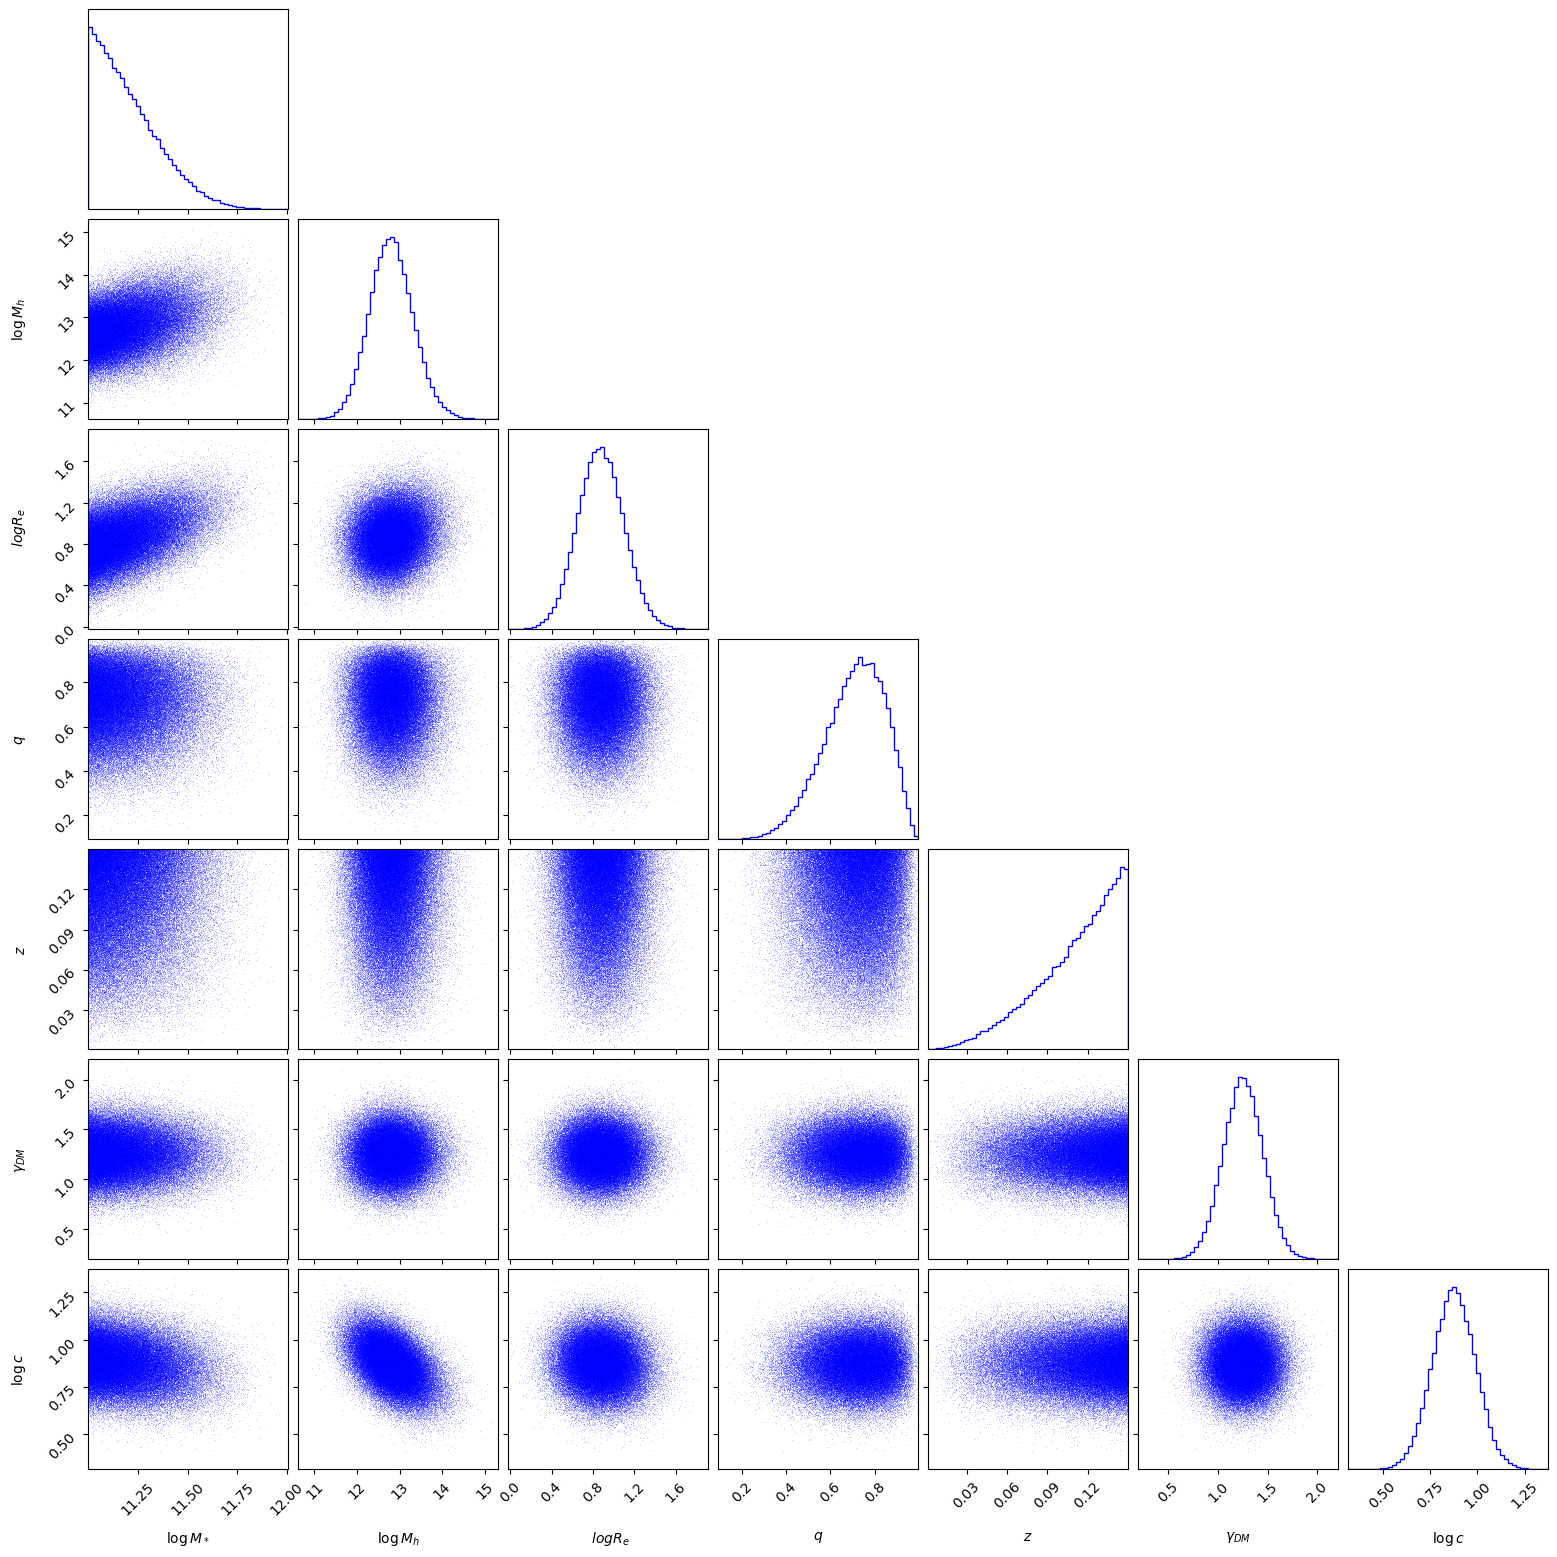

In [5]:
corner.corner(np.array([logMstar,logMh,logRe,q,z,gamma_DM,c]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$'], plot_contours = False,plot_density = False, bins = 50,data_kwargs = {'marker':'.','ms':0.7,'alpha':1,},dpi = 1000, color = 'b')
plt.show()

### fix_scatter sample

In [75]:
file_fix = h5py.File('./foreground_sample_fixsigma.h5','r')
file_fix.keys()

<KeysViewHDF5 ['alpha_sps', 'c', 'gamma_DM', 'logMh', 'logMstar', 'logRe', 'q', 'z']>

In [76]:
logMstar_fix = np.array(file_fix['logMstar'])
logMh_fix = np.array(file_fix['logMh'])
logRe_fix = np.array(file_fix['logRe'])
q_fix = np.array(file_fix['q'])
z_fix = np.array(file_fix['z'])
gamma_DM_fix = np.array(file_fix['gamma_DM'])
c_fix = np.array(file_fix['c'])

In [ ]:
corner.corner(np.array([logMstar_fix,logMh_fix,logRe_fix,q_fix,z_fix,gamma_DM_fix,c_fix]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$'], plot_contours = False,plot_density = False, bins = 50,data_kwargs = {'marker':'.','ms':0.7,'alpha':1,},dpi = 1000, color = 'r')

### Compare


In [78]:
import seaborn as sns

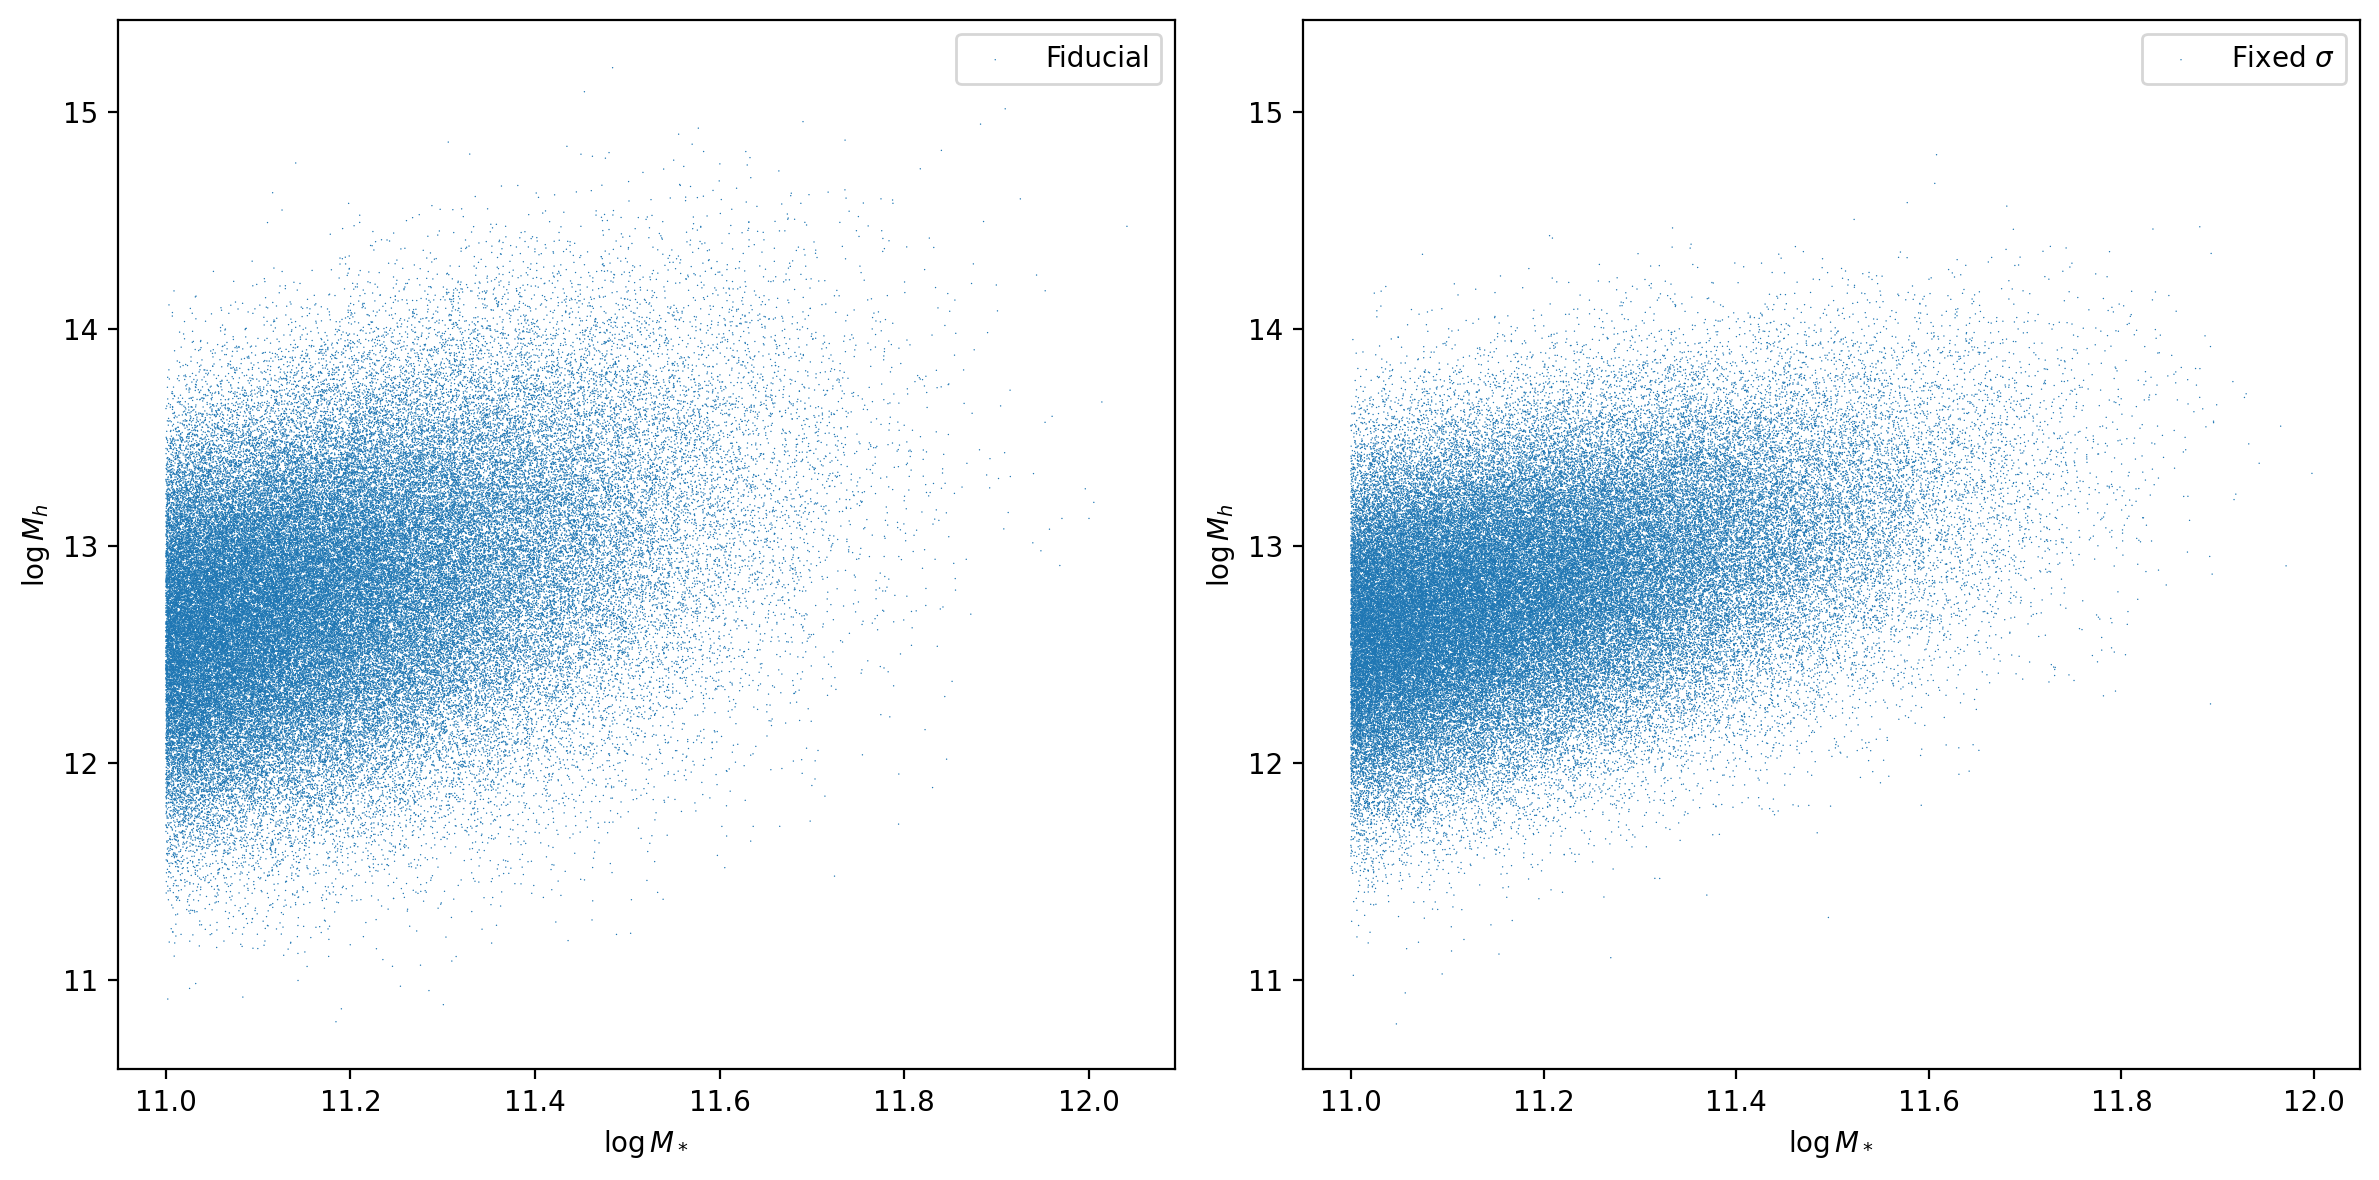

In [90]:
fig, ax = plt.subplots(1,2,figsize = (12,6),dpi = 200)

ax[0].scatter(logMstar,logMh,marker = '.',edgecolor = 'none', s = 1,label = 'Fiducial')
ax[0].set_xlabel(r'$\log M_*$')
ax[0].set_ylabel(r'$\log M_h$')
ax[0].legend()

ax[1].scatter(logMstar_fix,logMh_fix,marker = '.',edgecolor = 'none', s = 1, label = r'Fixed $\sigma$')
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlabel(r'$\log M_*$')
ax[1].set_ylabel(r'$\log M_h$')
ax[1].legend()

plt.tight_layout()
# sns.kdeplot(x = logMstar,y = logMh,shade = 0, cmap = 'Blues', levels= 5, label = 'Fiducial')
# sns.kdeplot(x = logMstar_fix,y = logMh_fix,shade = 0 ,cmap = 'Reds', levels = 5, label = r'Fixed $\sigma$')
# plt.legend()

## test profile

In [3]:
from profiles import gnfw, deV
ind = 619
r = np.logspace(-1,3,100)
gnfw = gnfw()
deV = deV()


### gnfw

In [29]:
#* dark matter
logMh = file['logMh'][ind]
rhos = file['rhos'][ind]
rs = file['rs'][ind]
rvir = rs*10**file['c'][ind]
c = 10**file['c'][ind]
gamma_DM = file['gamma_DM'][ind]
z = file['z'][ind]
# sigma = gnfw.Sigma(r,rs,gamma_DM)*rhos
# m2d = gnfw.M_enclosed_2D(r,rs,gamma_DM)*rhos


In [5]:
sigma_fast = gnfw.Sigma_fast(r,rs,gamma_DM)*rhos
m2d_fast = gnfw.M_enclosed_2D_fast(r,rs,gamma_DM)*rhos

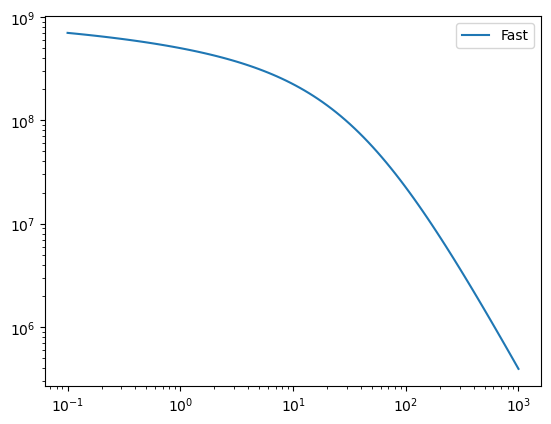

In [6]:
# plt.plot(r,sigma,label = 'Fiducial')
plt.plot(r,sigma_fast,label = 'Fast')
plt.legend()
plt.yscale('log')
plt.xscale('log')

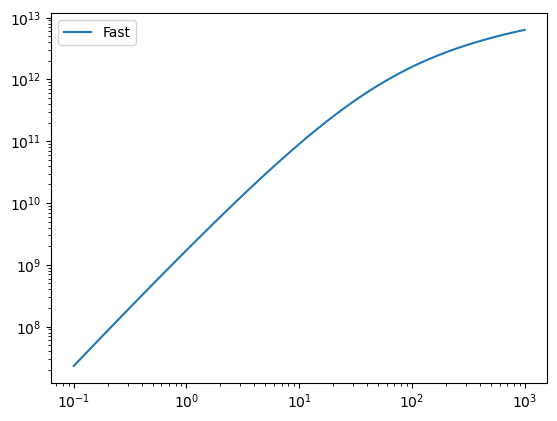

In [7]:
# plt.plot(r,m2d,label = 'Fiducial')
plt.plot(r,m2d_fast,label = 'Fast')
plt.legend()
plt.yscale('log')
plt.xscale('log')

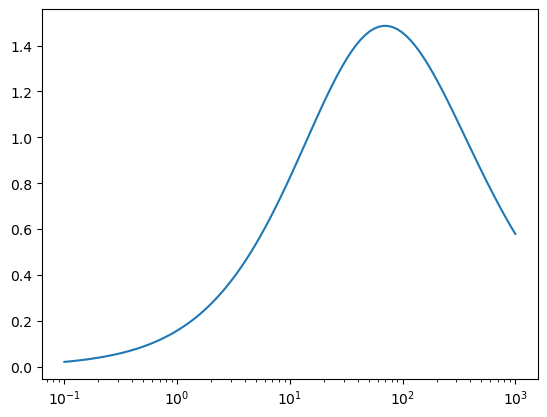

In [8]:
alpha = gnfw.alpha(r,rs,gamma_DM,z,2.5,rhos)
plt.plot(r,alpha)
plt.xscale('log')

### deVaucouleurs

In [9]:
logMstar = file['logMstar'][ind]
logRe = file['logRe'][ind]
sigma_dev = deV.Sigma(r,10**logRe)*10**logMstar
m2d_dev = deV.M_enclosed_2D(r,10**logRe)*10**logMstar

(1000000.0, 1000000000000.0)

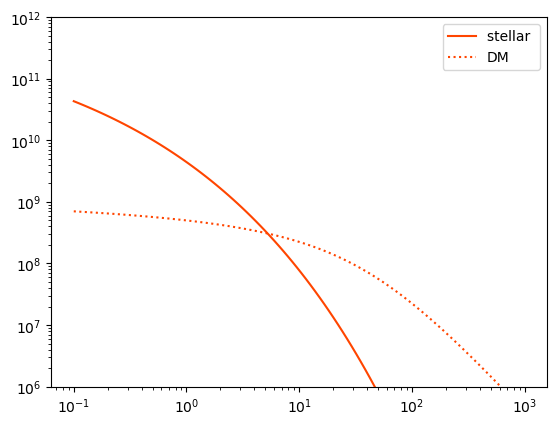

In [21]:
plt.plot(r,sigma_dev,label = 'stellar ',c = 'orangered')
plt.plot(r,sigma_fast,label = 'DM',c = 'orangered', ls = ':')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e6,1e12)

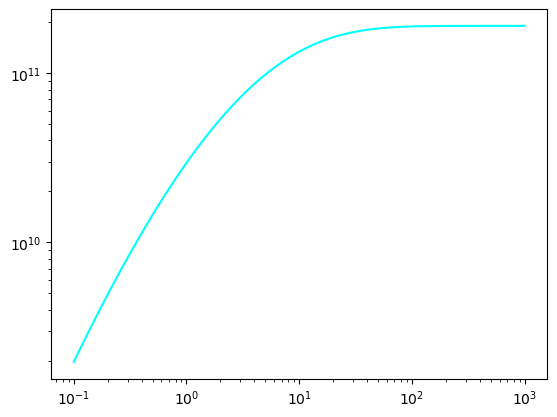

In [12]:
plt.plot(r,m2d_dev,label = 'stellar ',c = 'cyan')
plt.yscale('log')
plt.xscale('log')

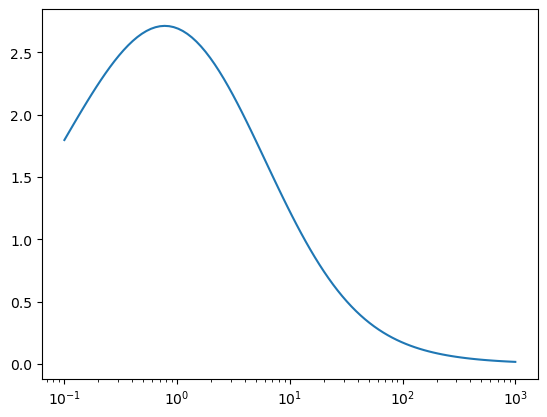

In [13]:
alpha_dev = deV.alpha(r,10**logRe,z,2.5,10**logMstar)
plt.plot(r,alpha_dev)
plt.xscale('log')

### gnfw + deVaucouleurs

In [14]:
from cal_caustic_area import *


(-3.0, 3.0)

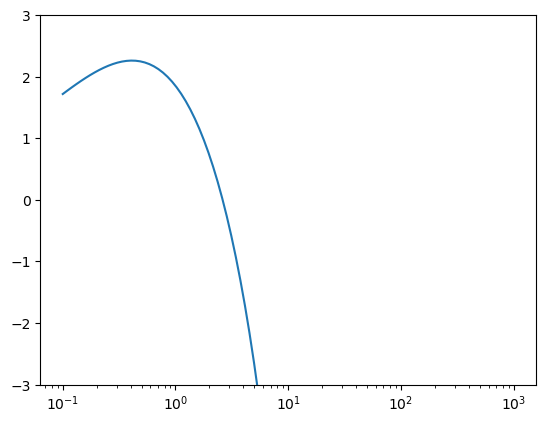

In [23]:
alp = alpha(r,rhos,rs,gamma_DM,10**logMstar,10**logRe,z,2.5)
plt.plot(r,alp-r)
plt.xscale('log')
plt.ylim(-3,3)

In [26]:
from scipy.optimize import root
r_ein_kpc = root(lambda x: alpha(x,rhos,rs,gamma_DM,10**logMstar,10**logRe,z,2.5)-x,1).x

In [35]:
import glafic 
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
p = [fg.cosmo_astropy.Om0, fg.cosmo_astropy.Ode0, fg.cosmo_astropy.w(0), fg.cosmo_astropy.h, 'out', -5, -5, 5, 5, 0.1, 0.1, 5]
#[omega, lambda, weos, hubble, prefix, xmin[arcsec], ymin[arcsec], xmax[arcsec], ymax[arcsec], pix_ext[arcsec], pix_poi[arcsec], maxlev]
glafic.init(*p)
glafic.startup_setnum(2,0,0)
glafic.set_lens(1,'gnfw', z,10**logMh*0.7,0,0,0,0,c/(2-gamma_DM), gamma_DM)
glafic.set_lens(2,'sers',z,10**logMstar*0.7,0,0,0,0,10**logRe*cosmo.arcsec_per_kpc_proper(z).value, 4)
glafic.model_init()

Rein_arcsec = glafic.calcein2(2.5,0,0,0)

######## parameter definition
omega    =  3.071000e-01
lambda   =  6.928089e-01
weos     =  -1.000000e+00
hubble   =  6.777000e-01
prefix   =  out
xmin     =  -5.000000e+00
ymin     =  -5.000000e+00
xmax     =  5.000000e+00
ymax     =  5.000000e+00
pix_ext  =  1.000000e-01
nx_ext   =  100
ny_ext   =  100
pix_poi  =  1.000000e-01
nx_poi   =  100
ny_poi   =  100
maxlev   =  5
ran_seed =  -1234

lens   gnfw    0.1419  2.277194e+12  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.865330e+00  8.519400e-01 
lens   sers    0.1419  1.331227e+11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.896459e+00  4.000000e+00 

0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

lens plane  1 : z = 0.141877



In [36]:
Rein_arcsec

1.0241086396139742

In [11]:
a = np.random.choice([0,1],size = 100)
b = np.linspace(1,100,100)
b[a==0]

array([ 4.,  5.,  6.,  7., 11., 13., 15., 16., 21., 24., 25., 28., 29.,
       30., 35., 36., 37., 38., 41., 43., 44., 46., 47., 50., 51., 52.,
       53., 54., 56., 58., 59., 60., 63., 68., 70., 72., 73., 76., 77.,
       79., 80., 82., 83., 85., 87., 89., 91., 94., 95., 96., 99.])